In [1]:
import os.path as op
from glob import glob

import numpy as np
from tedana.decay import fit_decay_ts, fit_decay_ts2, fit_decay
from nilearn.plotting import plot_carpet
from nilearn.masking import compute_epi_mask, apply_mask, unmask

In /Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
in_dir = '/Users/tsalo/Documents/Laird_DIVA/dset/sub-Blossom/ses-02/func/'
files = sorted(glob(op.join(in_dir, 'sub-Blossom_ses-02_task-PST_run-1_echo-*_bold.nii.gz')))
echo_times = np.array([15, 30, 45, 60])
mask = compute_epi_mask(files[0])
data = [apply_mask(f, mask).T for f in files]
data = np.stack(data, axis=1)

In [3]:
mask_bool = np.ones(data.shape[0], bool)
adaptive_mask = mask_bool * len(echo_times)
fittype = 'curvefit'

In [12]:
%%time
t2s_limited0, s0_limited0, t2s_full0, s0_full0 = fit_decay(
    data, tes=echo_times, 
    mask=mask_bool, adaptive_mask=adaptive_mask, 
    fittype='curvefit')

CPU times: user 3min 16s, sys: 2.87 s, total: 3min 19s
Wall time: 3min 27s


In [5]:
%%time
t2s_limited, s0_limited, t2s_full, s0_full = fit_decay_ts(
    data, tes=echo_times, 
    mask=mask_bool, adaptive_mask=adaptive_mask, 
    fittype='loglin')

CPU times: user 11.6 s, sys: 1.91 s, total: 13.5 s
Wall time: 7.46 s


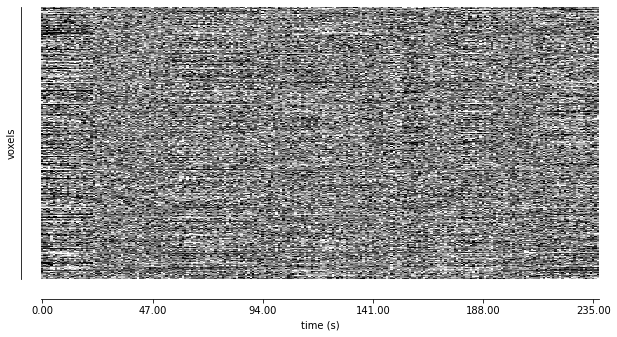

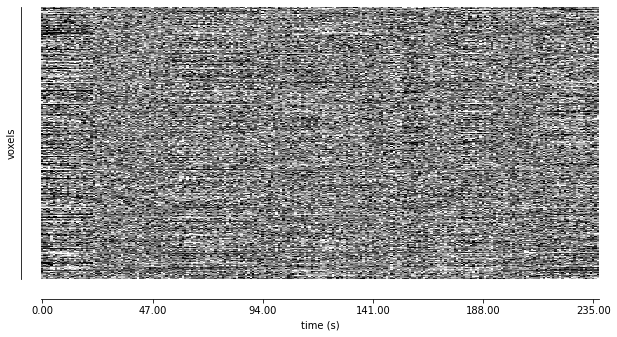

In [7]:
t2s_limited_ = unmask(t2s_limited.T, mask)
plot_carpet(t2s_limited_, mask_img=mask)

In [8]:
%%time
t2s_limited2, s0_limited2, t2s_full2, s0_full2 = fit_decay_ts2(
    data, tes=echo_times, 
    mask=mask_bool, adaptive_mask=adaptive_mask, 
    fittype='loglin')

CPU times: user 6.17 s, sys: 2.93 s, total: 9.1 s
Wall time: 8.63 s


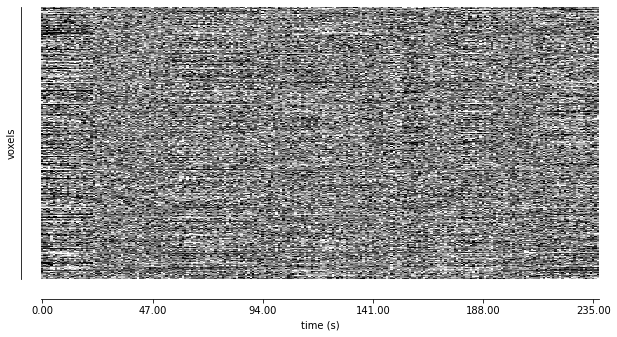

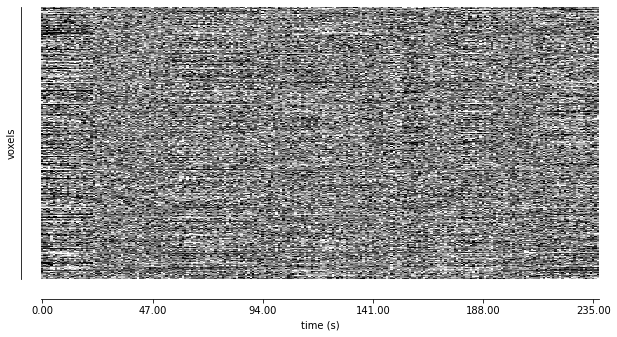

In [9]:
t2s_limited2_ = unmask(t2s_limited2.T, mask)
plot_carpet(t2s_limited2_, mask_img=mask)

In [10]:
np.array_equal(t2s_limited2, t2s_limited)

True

In [11]:
help(plot_carpet)

Help on function plot_carpet in module nilearn.plotting.img_plotting:

plot_carpet(img, mask_img=None, detrend=True, output_file=None, figure=None, axes=None, vmin=None, vmax=None, title=None)
    Plot an image representation of voxel intensities across time.
    
    This figure is also known as a "grayplot" or "Power plot".
    
    Parameters
    ----------
    img : Niimg-like object
        4D image.
        See http://nilearn.github.io/manipulating_images/input_output.html.
    mask_img : Niimg-like object or None, optional
        Limit plotted voxels to those inside the provided mask (default is
        None). If not specified a new mask will be derived from data.
        See http://nilearn.github.io/manipulating_images/input_output.html.
    detrend : :obj:`bool`, optional
        Detrend and z-score the data prior to plotting (default is `True`).
    output_file : :obj:`str` or None, optional
        The name of an image file to which to export the plot (default is
        No